In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1 = pd.read_csv('/Users/gyujin/Downloads/refined_data.csv')
data1.head()

,Unnamed: 0,기업명,매출액(백만원),순이익(백만원),구주매출,희망공모가(최저),희망공모가(최고),청약경쟁률(:1),확정공모가(원),경쟁률(:1),의무보유확약(:1),시초/공모%(수익률),공모가(원),시초가(원),상장일
0,0,에이치피에스피,61174.0,17658.0,1.00,23000.0,25000.0,1159.05,25000,1511.36,42.54,100.00,25000,50000,20220715
1,1,영창케미칼,60760.0,2506.0,0.83,15000.0,18600.0,682.13,18600,1616.27,5.92,-1.08,18600,18400,20220714
2,2,넥스트칩,10383.0,-13496.0,1.00,9900.0,11600.0,1727.38,13000,1623.41,11.58,31.92,13000,17150,20220701
3,3,위니아에이드,418527.0,24895.0,1.00,14200.0,16200.0,111.26,16200,955.00,1.39,-9.88,16200,14600,20220623
4,4,레이저쎌,3879.0,-7665.0,1.00,12000.0,14000.0,1845.11,16000,1442.95,12.43,28.75,16000,20600,20220624


In [3]:
from sklearn.model_selection import train_test_split
x= data1[["희망공모가(최고)","청약경쟁률(:1)","확정공모가(원)","경쟁률(:1)","의무보유확약(:1)"]]
y= data1["시초/공모%(수익률)"]

In [4]:
x_train, x_test,y_train,y_test = train_test_split(x, y, train_size=0.8,test_size=0.2,random_state = 1)
#8:2의 비율로 training, test set 분리

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_test)

(316, 5)
(80, 5)
174      5.31
358     78.57
249    100.00
273      9.03
339      9.52
        ...  
146     73.53
287      0.42
222     24.17
159     81.56
23     100.00
Name: 시초/공모%(수익률), Length: 80, dtype: float64


In [6]:
#pip install xgboost

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [8]:
cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)
pipe_linear = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_lasso = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])
pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])
pipe_pca = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA()),
                 ('fit', Ridge(random_state = 42))])
pipe_pls = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', PLS())])
pipe_gbr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', RFR())])
pipe_svr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', SVR())])

pipe_KR = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', KernelRidge())])
                 
                 
### 

grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : np.logspace(-5,1,10) ,     
                     }]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]
grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(2,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]
grid_params_pls = [{
    "fit__n_components" : np.arange(2,8)
}]
min_samples_split_range = [0.5, 0.7 , 0.9]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
grid_params_KR =[{
    "fit__kernel" : ["rbf","linear"] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
pipe = [
    pipe_linear , pipe_lasso ,  pipe_pca ,
    pipe_ridge , pipe_pls , pipe_gbr , 
    pipe_rfr , pipe_svr , pipe_KR 
]

params = [
    grid_params_linear , grid_params_lasso , grid_params_pca,
    grid_params_ridge , grid_params_pls , grid_params_gbr ,
    grid_params_rfr , grid_params_svr , grid_params_KR
]

jobs = 20

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, scoring  = "neg_mean_squared_error" , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(x_train , y_train)
    y_pred = search.predict(x_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

/Users/gyujin/miniforge3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gyujin/miniforge3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gyujin/miniforge3/envs/ml/lib/python3.8/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/gyujin/miniforge3/envs/ml/lib/python3.8/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted

finish


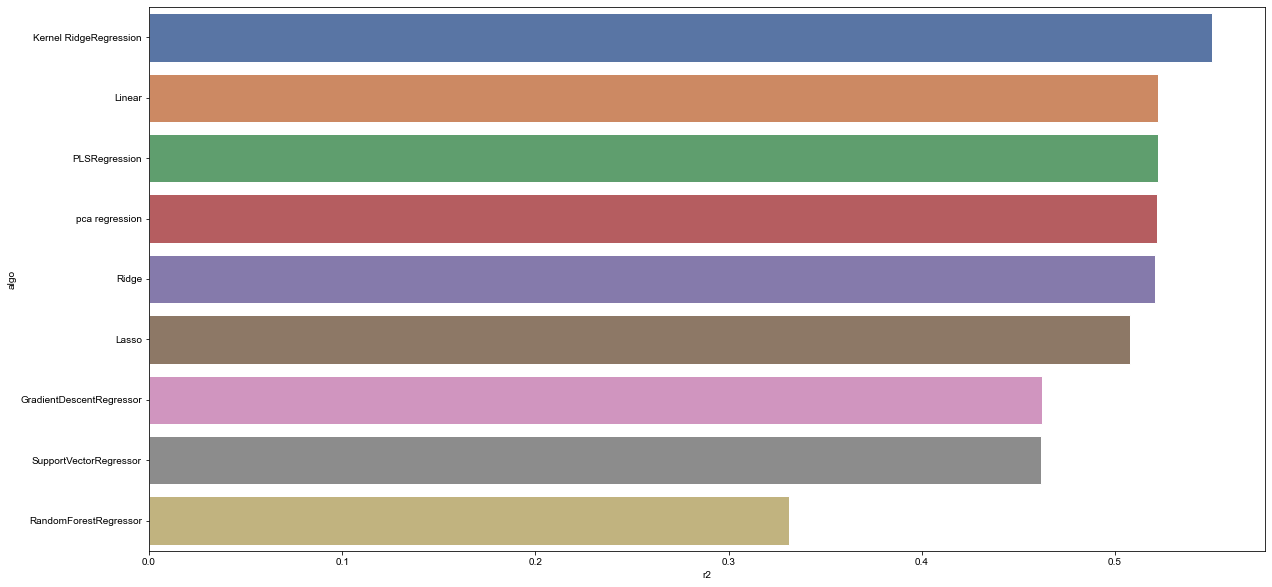

In [9]:
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show()

In [10]:
#model_mse
model_r2
model_best_params

{'Linear': {'fit__fit_intercept': True, 'poly__degree': 1},
 'Lasso': {'fit__alpha': 0.46415888336127725,
  'fit__tol': 1e-05,
  'poly__degree': 2},
 'pca regression': {'pca__n_components': 5},
 'Ridge': {'fit__alpha': 2.0,
  'fit__solver': 'lsqr',
  'fit__tol': 0.005994842503189409,
  'poly__degree': 1},
 'PLSRegression': {'fit__n_components': 5},
 'GradientDescentRegressor': {'fit__loss': 'ls',
  'fit__max_depth': 6,
  'fit__max_features': 'log2',
  'fit__min_samples_split': 0.5},
 'RandomForestRegressor': {'fit__max_depth': 5,
  'fit__max_features': 'log2',
  'fit__min_samples_split': 0.5},
 'SupportVectorRegressor': {'fit__degree': 2,
  'fit__gamma': 1e-05,
  'fit__kernel': 'linear'},
 'Kernel RidgeRegression': {'fit__gamma': 0.021544346900318822,
  'fit__kernel': 'rbf'}}

In [11]:
from sklearn.linear_model import Lasso
model.fit(x_train, y_train)
lasso = Lasso(alpha=0.004641588833612777).fit(x_train, y_train)
prd = lasso
prd.fit(x_train,y_train)

Lasso(alpha=0.004641588833612777)

In [12]:
y_predict = lasso.predict(x_test)

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [14]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


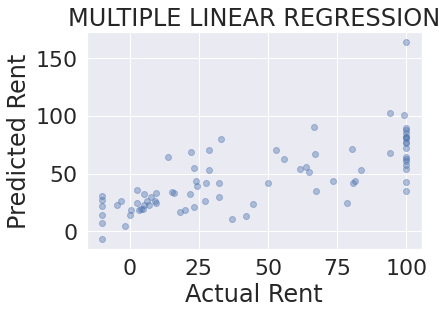

In [15]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error
mae_test=mean_absolute_error(y_test,y_predict)
#수치가 낮을수록 정확도가 높음
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(y_test, y_predict)
#수치가 낮을수록 정확도가 높음
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, y_predict)

In [17]:
print('lasso regression: Mean squared error: %f' %(mse_test)) 
print('lasso regression: Mean_absolute_error: %f' %(mae_test)) 
print('lasso regression: r2_score: %f' %(r2_score))

lasso regression: Mean squared error: 756.854335
lasso regression: Mean_absolute_error: 23.143115
lasso regression: r2_score: 0.522454


In [18]:
import joblib
joblib.dump(prd, 'saved_model.pkl')

['saved_model.pkl']

In [19]:
import joblib
prd = joblib.load('saved_model.pkl')

In [20]:
import pickle
with open('saved_model.pickle','wb') as fw:
    pickle.dump(prd,fw)

In [21]:
import pickle
with open('saved_model.pickle','rb') as f:
    model3 = pickle.load(f)

In [22]:
model3

Lasso(alpha=0.004641588833612777)

In [23]:
print('lasso regression: r2_score: %f' %(r2_score))

lasso regression: r2_score: 0.522454
